<a href="https://colab.research.google.com/github/PunnawatSiri/BMMMS_DOH/blob/main/BMMS_Dechatiwong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# โครงการประเมินศักยภาพในการให้บริการสะพานเดชาติวงศ์ 2,3 หลังการใช้งาน 45 ปี
Jupyter Notebook เขียนโดย ปัณณวัชร์ สิริพัฒน์ธิติ, สว., กรมทางหลวง

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Github/DOH/BMMS

/content/drive/MyDrive/Github/DOH/BMMS


In [ ]:
ls -a

M20170219.mat


In [ ]:
import scipy.io
import os
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew

from IPython.display import Audio

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 3)
plt.rcParams['image.cmap'] = 'gray'

# Read and plot time-series

In [ ]:
for file_path in os.listdir():
  if file_path.endswith(".mat"):
    print(file_path)
    mat = scipy.io.loadmat(file_path)

M20170219.mat


In [ ]:
mat["sum"].shape

(1727741, 86)

In [ ]:
Hsensors = [str(s[0]) for s in mat["Hsensor"][0]]
print(Hsensors)

['Time(s)', 'TL01', 'ST01', 'ST02', 'ST03', 'ST04', 'SG01', 'SG02', 'SG03', 'SG04', 'SG05', 'SG06', 'SG07', 'SG08', 'SG09', 'SG10', 'SG11', 'SG12', 'SG13', 'SG14', 'SG15', 'SG16', 'SG17', 'SG18', 'SG19', 'SG20', 'SG21', 'SG22', 'SG23', 'SG24', 'SG25', 'SG26', 'SG27', 'SG28', 'SG29', 'SG30', 'SG31', 'SG32', 'SG33', 'SG34', 'SG35', 'SG36', 'SG37', 'SG38', 'SG39', 'SG40', 'SG41', 'SG42', 'SG43', 'SG44', 'SG45', 'SG46', 'SG47', 'SG48', 'SG49', 'SG50', 'SG51', 'SG52', 'SG53', 'SG54', 'SG55', 'SG56', 'SG57', 'SG58', 'SG59', 'SG60', 'SG61', 'SG62', 'SG63', 'SG64', 'SG65', 'SG66', 'SG67', 'SG68', 'SG69', 'SG70', 'SG71', 'SG72', 'SG73', 'SG74', 'SG75', 'SG76', 'SG77', 'SG78', 'SG79', 'SG80']


In [ ]:
epsilon = 1e-6
def plot_raw_signal(y,key):
    Fs = 1 / SR # sampling frequency
    t = np.arange(0, 10, Fs)
    sensor_index = Hsensors.index(key)
    fig, axs = plt.subplots()
    t = np.arange(0,len(mat['sum'][:,sensor_index]))
    axs.set_title(f'Signal: {key}')
    axs.plot(t, mat['sum'][:,sensor_index], color='C0')
    axs.set_xlabel("Time")
    axs.set_ylabel("Amplitude")
    plt.show()

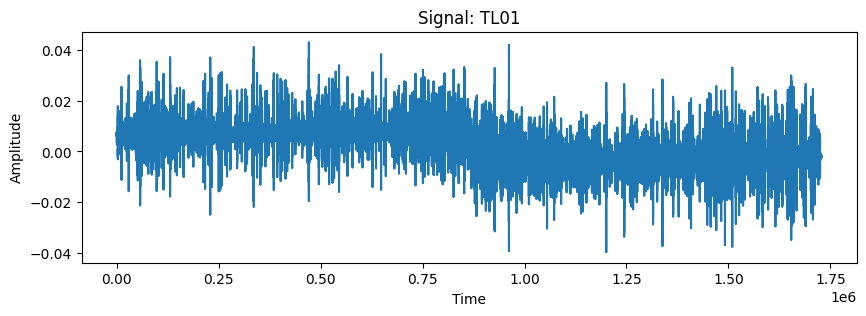

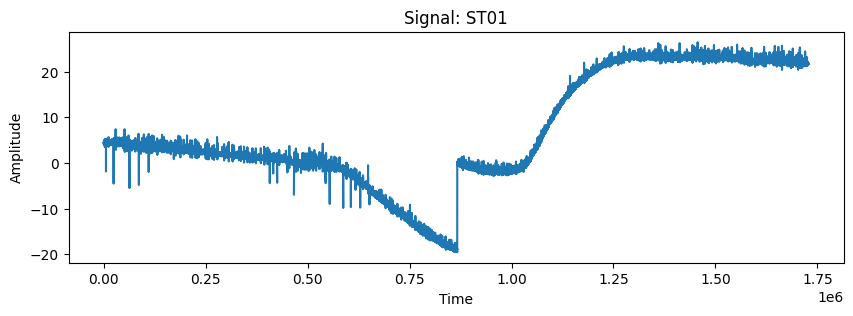

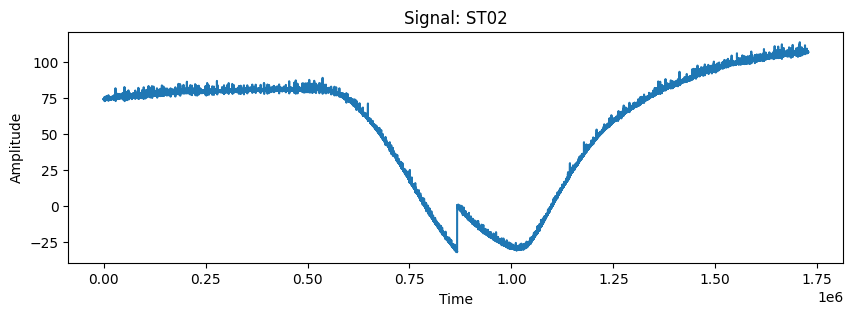

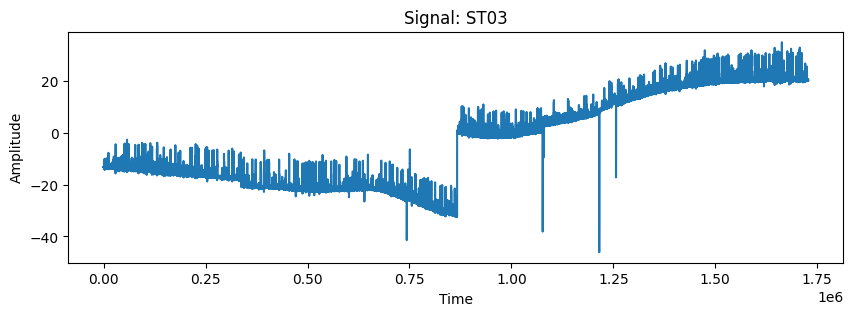

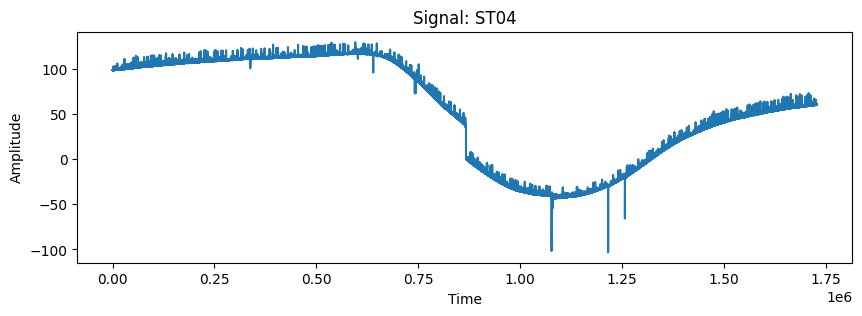

In [ ]:
SR = 16000 #Spectral Recording
i = 0
for sensor_name in Hsensors[1:]:
  plot_raw_signal(mat['sum'],sensor_name)
  i += 1
  if i == 5: break

Another represention of a time series can be on the Fourrier domain.

Remainder : The Fourier transform (FT) is a mathematical transform that decomposes functions depending on time into functions depending on temporal frequency

* Computer the short fourier transform of "y" using e.g. function ```librosa.stft()``` function.</li>

## อ่านเพิ่มเติมได้ที่ https://medium.com/@startfromminus/asr-101-96ce0bc32ced

In [ ]:
##complete the function for ploting the Spectrogram using the short fourier transform of a signal
def plot_spectrogram(y,key, n_fft=1600, hop_length=1600):
    sensor_index = Hsensors.index(key)
    x = librosa.stft(y[:,sensor_index])
    fig, axs = plt.subplots()
    librosa.display.specshow(20*np.log10(np.abs(x)+epsilon),sr=SR,hop_length=hop_length,x_axis="time",y_axis="linear",ax=axs)
    axs.set_title(f'Spectrogram: {key}')
    plt.show

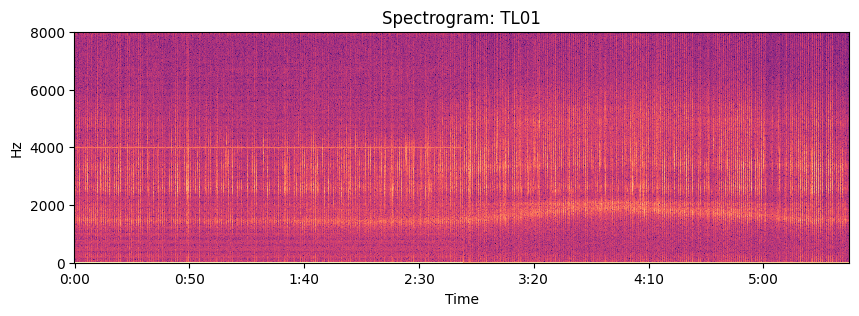

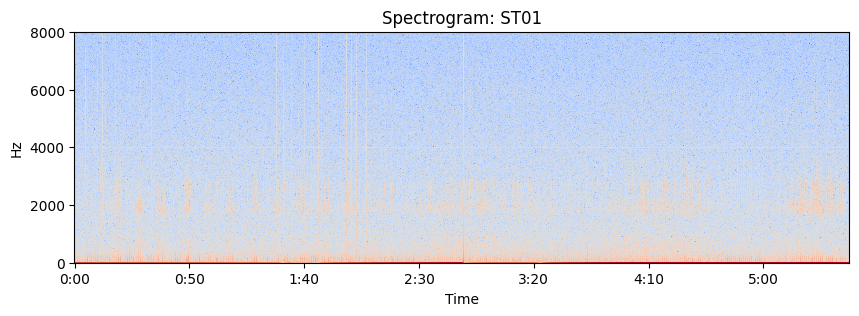

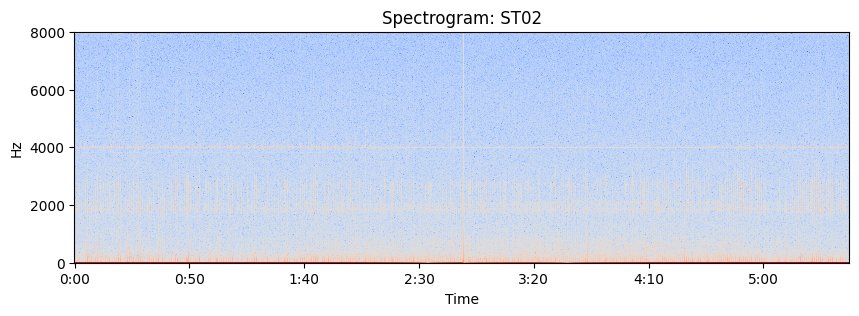

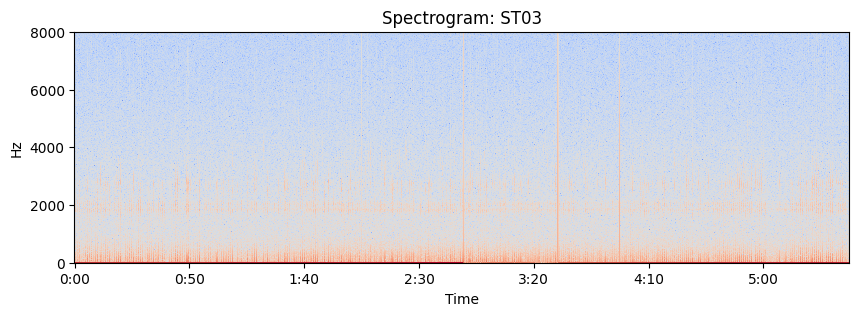

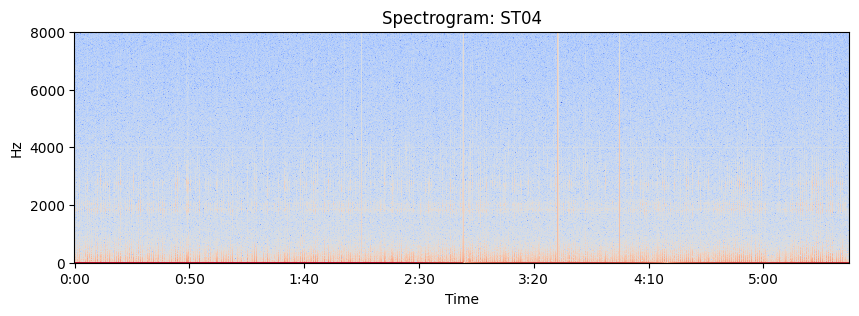

In [ ]:
i = 0
for sensor_name in Hsensors[1:]:
  plot_spectrogram(mat['sum'],sensor_name)
  i += 1
  if i == 5: break

Another represention of a time series can be on the Fourrier domain by computing the mel spectrogram representation.

* Computer the mel spectrogram representation of "y" using e.g. function ```librosa.feature.melspectrogram()``` function.</li>

In [ ]:
##complete the function for ploting the MEL-Spectrogram
def plot_mel_spectrogram(y,key, n_fft=1600, hop_length=1600):
    sensor_index = Hsensors.index(key)
    x = librosa.feature.melspectrogram(y=y[:,sensor_index])
    fig, axs = plt.subplots()
    librosa.display.specshow(20*np.log10(np.abs(x)+epsilon),sr=SR,hop_length=hop_length,x_axis="time",y_axis="mel",ax=axs)
    axs.set_title(f'Mel-Spectrogram: {key}')
    plt.show

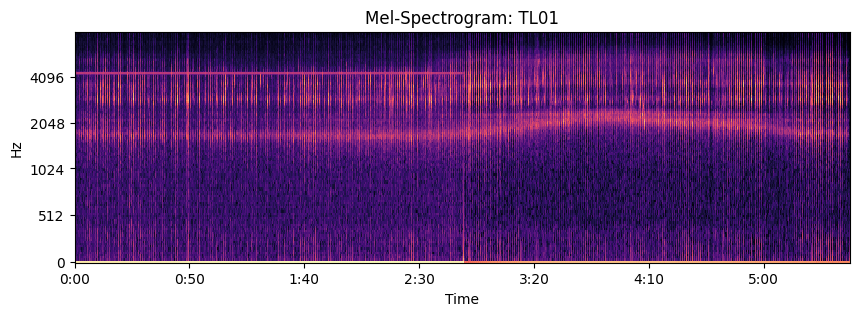

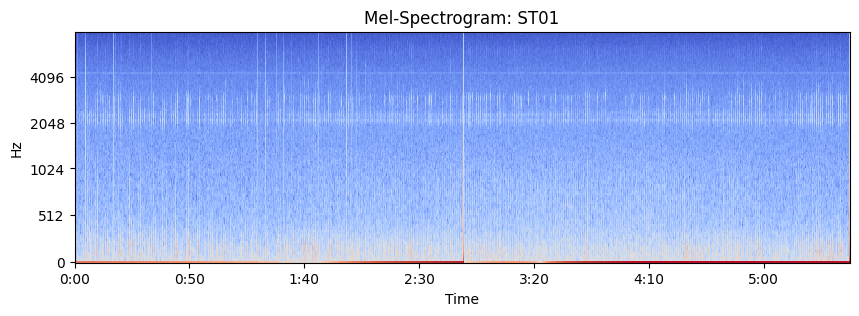

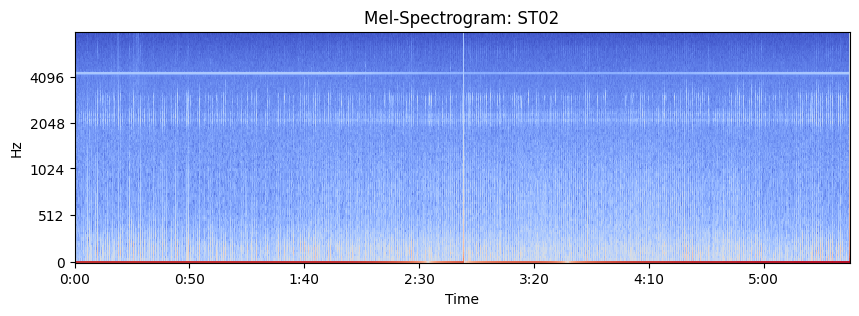

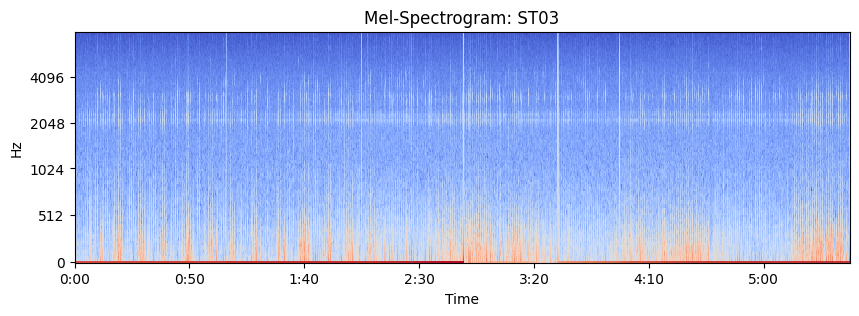

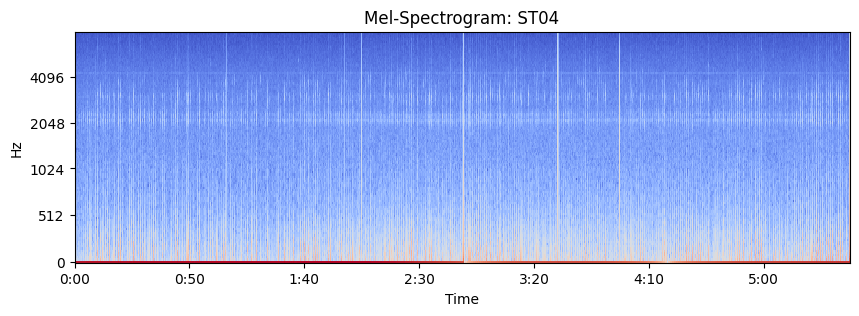

In [ ]:
i = 0
for sensor_name in Hsensors[1:]:
  plot_mel_spectrogram(mat['sum'],sensor_name)
  i += 1
  if i == 5: break

## Load .xlsx file

จาก รายงาน ตารางที่ 6.2-1 ค่าเฉลี่ยน้ำหนักรถบรรทุก 10 ประเภท ที่วิ่งบนสะพานเดชาติวงศ์ 3

T2

In [ ]:
# load .xlsx to dataframe
import pandas as pd
df = pd.read_excel('/content/T20170219.xlsx',names=['c1','','c3'])
df.head()

c1   c2  c3
0   585   T3   1
1   589   T3   1
2  1247   T3   1
3  1475  3F3   1
4  1912  3S3   2